In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# Diretory and image paths
load_order = [
    "OneWayRoadTexture.png",
    "TwoWayRoadTexture.png",
    "RedCarTexture.png",
    "GreenCarTexture.png",
    "BlueCarTexture.png",
    "GarageTexture.png",
    "DestinationTexture.png",
    "IntersectionTexture.png"
]

source_dir = os.getcwd()

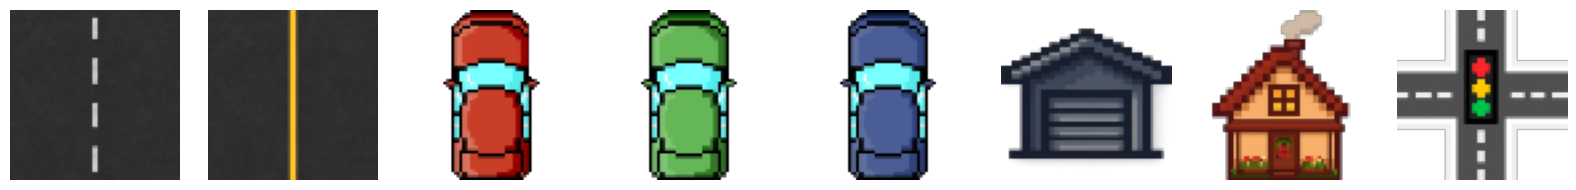

In [7]:
# Load tiles
tiles = [Image.open(os.path.join(source_dir, file)) for file in load_order]
fig, axes = plt.subplots(1, len(tiles), figsize=(len(tiles) * 2, 2))
for ax, img in zip(axes, tiles):
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [32]:
# Create texture canvas
width, height, tile_size = 1280, 768, 64
canvas = Image.new("RGBA", (width, height), (255, 255, 255, 0))

for i, tile in enumerate(tiles):
    row = (i * tile_size) // width
    col = i % (width // tile_size)
    canvas.paste(tile, (col * tile_size, row * tile_size))

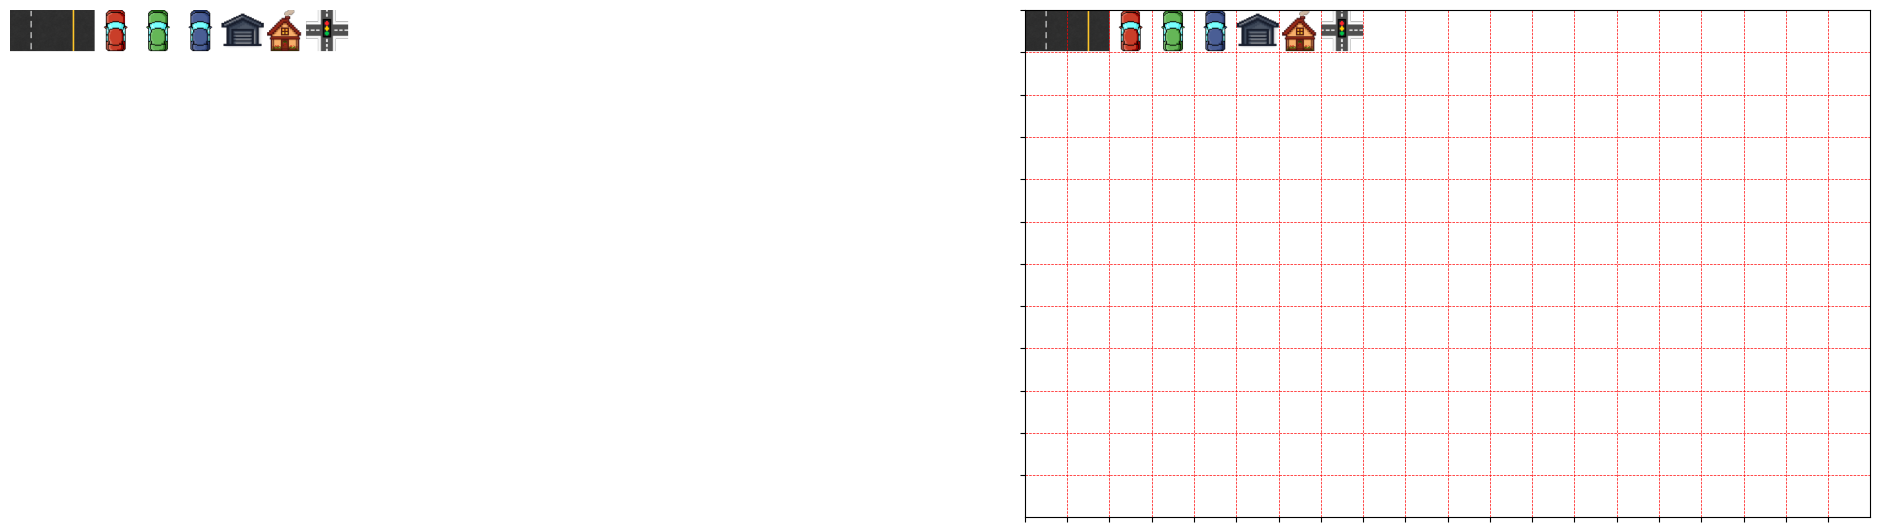

In [33]:
# Display canvas
fig, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].imshow(canvas)
axes[0].axis('off')

axes[1].set_xticks(range(0, width, tile_size)) 
axes[1].set_yticks(range(0, height, tile_size))
axes[1].grid(color='red', linestyle='--', linewidth=0.5)
axes[1].set_xticklabels([])
axes[1].set_yticklabels([])
axes[1].imshow(canvas)

plt.show()

In [35]:
# Save the canvas

canvas = canvas.convert("RGBA")
canvas.save(os.path.join(source_dir, "texture_map.png"), format="PNG")